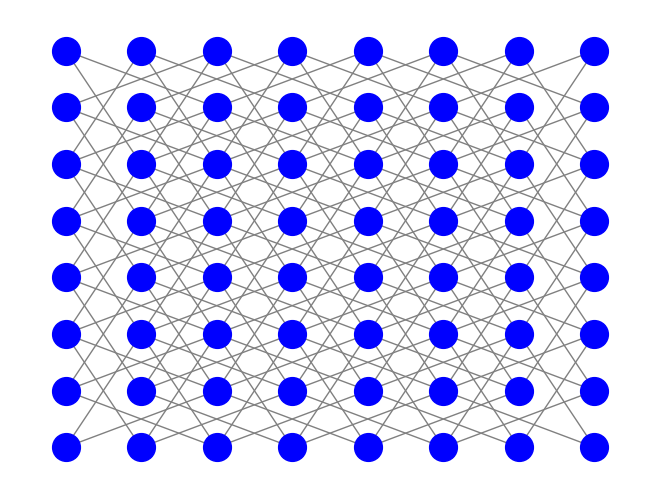

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def add_knight_moves(graph, row, col, n):
    possible_moves = [
        (-2, -1), (-2, 1),
        (-1, -2), (-1, 2),
        (1, -2), (1, 2),
        (2, -1), (2, 1)
    ]

    for move in possible_moves:
        new_row = row + move[0]
        new_col = col + move[1]
        if 0 <= new_row < n and 0 <= new_col < n:
            graph.add_edge((row, col), (new_row, new_col))


n = 8
chessboard_graph = nx.Graph()

for row in range(n):
    for col in range(n):
        chessboard_graph.add_node((row, col))

for row in range(n):
    for col in range(n):
        add_knight_moves(chessboard_graph, row, col, n)

pos = {(row, col): (col, -row) for row in range(n) for col in range(n)}
nx.draw(chessboard_graph, pos, with_labels=False, node_size=400, font_size=10, node_color='blue', edge_color='gray')
plt.show()


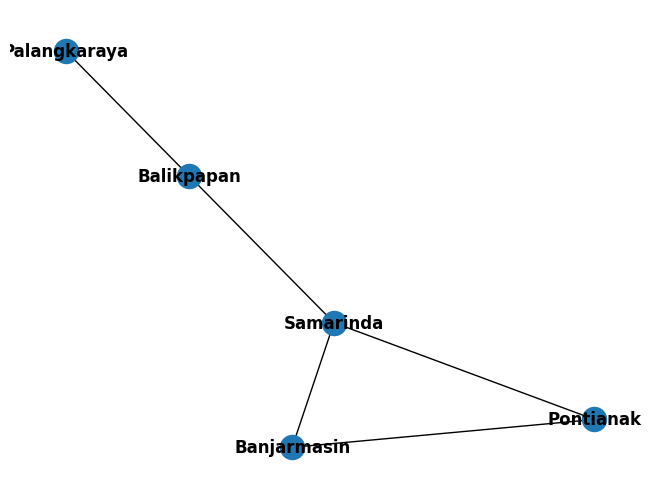

Degree of Pontianak: 2
Degree of Banjarmasin: 2
Degree of Samarinda: 3
Degree of Balikpapan: 2
Degree of Palangkaraya: 1
It is possible to travel all roads once in Kalimantan.


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


kota = ['Pontianak', 'Banjarmasin', 'Samarinda', 'Balikpapan', 'Palangkaraya']
jalan = [
    ('Pontianak', 'Banjarmasin'),
    ('Pontianak', 'Samarinda'),
    ('Banjarmasin', 'Samarinda'),
    ('Samarinda', 'Balikpapan'),
    ('Balikpapan', 'Palangkaraya')
]


G.add_nodes_from(kota)
G.add_edges_from(jalan)

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()

for node in G.nodes():
    degree = G.degree(node)
    print(f'Degree of {node}: {degree}')

odd_degrees = [node for node in G.nodes() if G.degree(node) % 2 != 0]
if len(odd_degrees) == 0 or len(odd_degrees) == 2:
    print("It is possible to travel all roads once in Kalimantan.")
else:
    print("It is not possible to travel all roads once in Kalimantan.")


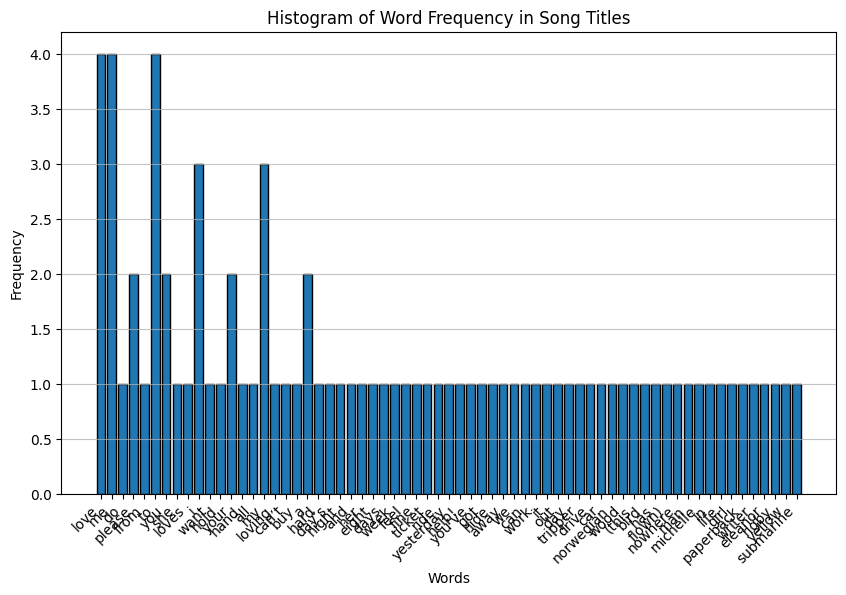

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

song_titles = [
    'Love Me Do',
    'Please Please Me',
    'From Me To You',
    'She Loves You',
    'I Want To Hold Your Hand',
    'All My Loving',
    'Can’t Buy Me Love',
    'A Hard Day’s Night',
    'And I Love Her',
    'Eight Days A Week',
    'I Feel Fine',
    'Ticket To Ride',
    'Yesterday',
    'Help!',
    'You’ve Got To Hide Your Love Away',
    'We Can Work It Out',
    'Day Tripper',
    'Drive My Car',
    'Norwegian Wood (This Bird Has Flown)',
    'Nowhere Man',
    'Michelle',
    'In My Life',
    'Girl',
    'Paperback Writer',
    'Eleanor Rigby',
    'Yellow Submarine'
]

word_counter = Counter()
for title in song_titles:
    word_counter.update(title.lower().split())

words = list(word_counter.keys())
frequency = list(word_counter.values())

plt.figure(figsize=(10, 6))
plt.bar(words, frequency, edgecolor='black')
plt.title('Histogram of Word Frequency in Song Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)

plt.show()


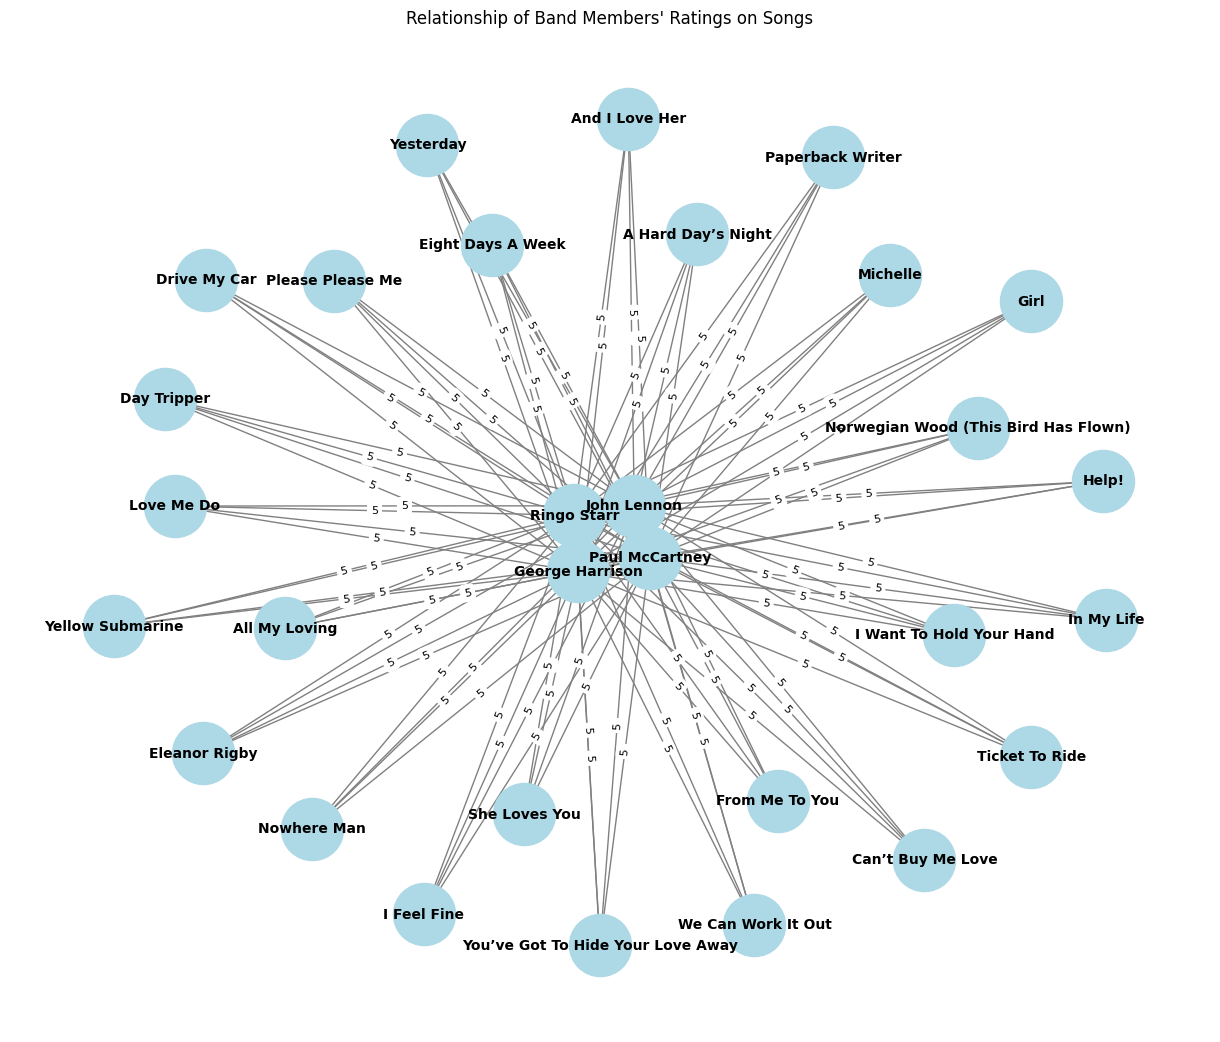

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

recommendation_graph = nx.Graph()

band_members = ["John Lennon", "Paul McCartney", "George Harrison", "Ringo Starr"]

# Recorded: 1962-1966
# Producer: George Martin
# Released: 19 April 1973 (UK), 2 April 1973 (US)
# Tracklisting
songs = [
    'Love Me Do',
    'Please Please Me',
    'From Me To You',
    'She Loves You',
    'I Want To Hold Your Hand',
    'All My Loving',
    'Can’t Buy Me Love',
    'A Hard Day’s Night',
    'And I Love Her',
    'Eight Days A Week',
    'I Feel Fine',
    'Ticket To Ride',
    'Yesterday',
    'Help!',
    'You’ve Got To Hide Your Love Away',
    'We Can Work It Out',
    'Day Tripper',
    'Drive My Car',
    'Norwegian Wood (This Bird Has Flown)',
    'Nowhere Man',
    'Michelle',
    'In My Life',
    'Girl',
    'Paperback Writer',
    'Eleanor Rigby',
    'Yellow Submarine'
]

# Menambahkan simpul (anggota band) ke dalam graf
recommendation_graph.add_nodes_from(band_members)

# Menambahkan edge (penilaian) anggota band terhadap lagu-lagu
for member in band_members:
    for song in songs:
        recommendation_graph.add_edge(member, song, weight=5)  # Anggap semua member memberi rating 5 pada lagu-lagu

# Menampilkan visualisasi graf
pos = nx.spring_layout(recommendation_graph, seed=42)
edge_labels = {(u, v): d['weight'] for u, v, d in recommendation_graph.edges(data=True)}

plt.figure(figsize=(12, 10))
nx.draw(recommendation_graph, pos, with_labels=True, node_size=2000, font_size=10, font_weight='bold', node_color='lightblue', edge_color='gray')
nx.draw_networkx_edge_labels(recommendation_graph, pos, edge_labels=edge_labels, font_size=8)
plt.title('Relationship of Band Members\' Ratings on Songs')
plt.show()


In [3]:
from collections import deque

# Representasi state: (jumlah_misionaris_kiri, jumlah_kanibal_kiri, sisi_perahu)
start_state = (3, 3, 1)
goal_state = (0, 0, 0)

def is_valid(state):
    m_left, c_left, boat = state
    m_right = 3 - m_left
    c_right = 3 - c_left

    if m_left < 0 or m_right < 0 or c_left < 0 or c_right < 0:
        return False

    if (m_left > 0 and m_left < c_left) or (m_right > 0 and m_right < c_right):
        return False

    return True

def successors(state):
    moves = [(1, 0), (2, 0), (0, 1), (0, 2), (1, 1)]
    result = []

    for move in moves:
        if state[2] == 1:
            new_state = (state[0] - move[0], state[1] - move[1], 0)
        else:
            new_state = (state[0] + move[0], state[1] + move[1], 1)

        if is_valid(new_state):
            result.append(new_state)

    return result

def dfs():
    visited = set()
    stack = deque([(start_state, [])])

    while stack:
        state, path = stack.pop()
        visited.add(state)

        if state == goal_state:
            return path

        for succ in successors(state):
            if succ not in visited:
                stack.append((succ, path + [state]))

    return None

def print_solution(path):
    print("Solution:")
    for state in path:
        print(state)

def main():
    path = dfs()
    if path:
        print_solution(path)
    else:
        print("No solution found.")

if __name__ == "__main__":
    main()


Solution:
(3, 3, 1)
(2, 2, 0)
(3, 2, 1)
(3, 0, 0)
(3, 1, 1)
(1, 1, 0)
(2, 2, 1)
(0, 2, 0)
(0, 3, 1)
(0, 1, 0)
(0, 2, 1)


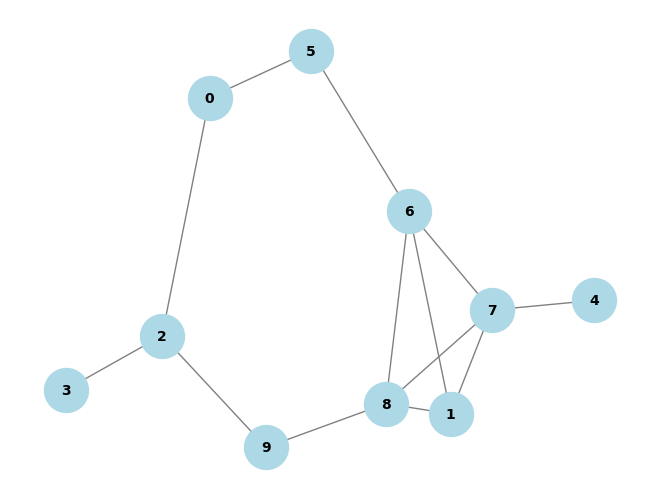

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_graph(num_nodes, num_edges):
    G = nx.Graph()

    for i in range(num_nodes):
        G.add_node(i)

    for _ in range(num_edges):
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)

    return G

def draw_graph(graph):
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_size=1000, font_size=10, font_weight='bold', node_color='lightblue', edge_color='gray')
    plt.show()

random_graph = generate_random_graph(10, 15)
draw_graph(random_graph)


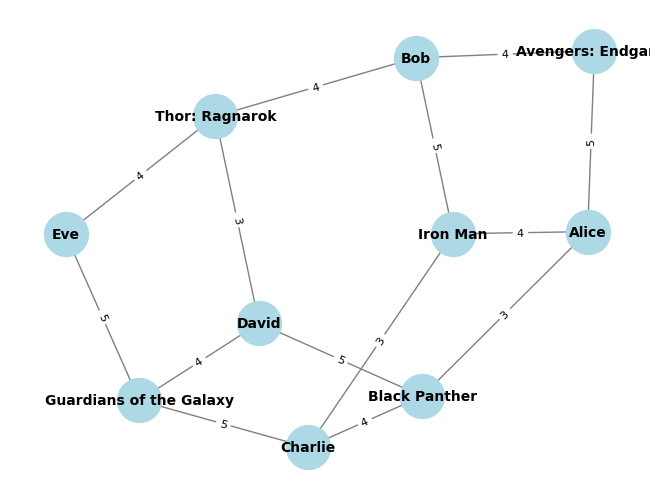

In [28]:
import networkx as nx
import matplotlib.pyplot as plt


recommendation_graph = nx.Graph()

users = ["Alice", "Bob", "Charlie", "David", "Eve"]
for user in users:
    recommendation_graph.add_node(user)

ratings = {
    "Alice": {"Avengers: Endgame": 5, "Iron Man": 4, "Black Panther": 3},
    "Bob": {"Avengers: Endgame": 4, "Iron Man": 5, "Thor: Ragnarok": 4},
    "Charlie": {"Iron Man": 3, "Black Panther": 4, "Guardians of the Galaxy": 5},
    "David": {"Black Panther": 5, "Thor: Ragnarok": 3, "Guardians of the Galaxy": 4},
    "Eve": {"Thor: Ragnarok": 4, "Guardians of the Galaxy": 5}
}


for user, ratings_dict in ratings.items():
    for movie, rating in ratings_dict.items():
        recommendation_graph.add_edge(user, movie, weight=rating)

pos = nx.spring_layout(recommendation_graph, seed=42)
edge_labels = {(u, v): d['weight'] for u, v, d in recommendation_graph.edges(data=True)}
nx.draw(recommendation_graph, pos, with_labels=True, node_size=1000, font_size=10, font_weight='bold', node_color='lightblue', edge_color='gray')
nx.draw_networkx_edge_labels(recommendation_graph, pos, edge_labels=edge_labels, font_size=8)
plt.show()


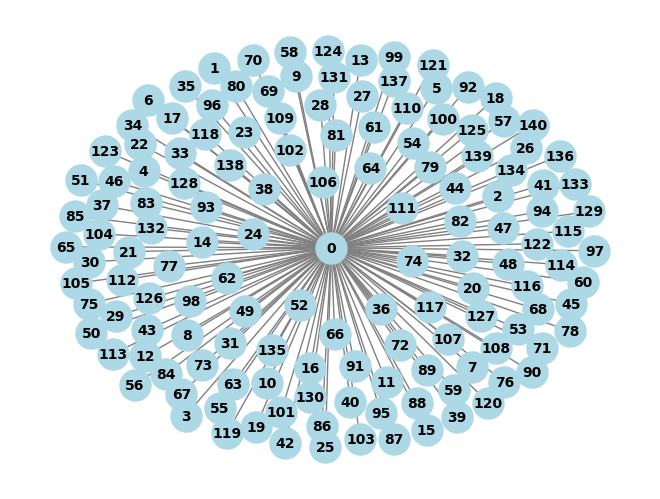

In [8]:
import cv2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)
_, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

num_labels, labels = cv2.connectedComponents(thresholded)

connected_graph = nx.Graph()

for label in range(1, num_labels):
    connected_graph.add_node(label)

height, width = labels.shape
for y in range(height):
    for x in range(width):
        current_label = labels[y, x]
        if current_label > 0:
            for dy in [-1, 0, 1]:
                for dx in [-1, 0, 1]:
                    new_y, new_x = y + dy, x + dx
                    if 0 <= new_y < height and 0 <= new_x < width and labels[new_y, new_x] != current_label:
                        connected_graph.add_edge(current_label, labels[new_y, new_x])

pos = nx.spring_layout(connected_graph, seed=42, scale=2)
nx.draw(connected_graph, pos, with_labels=True, node_size=500, font_size=10, font_weight='bold', node_color='lightblue', edge_color='gray')
plt.show()


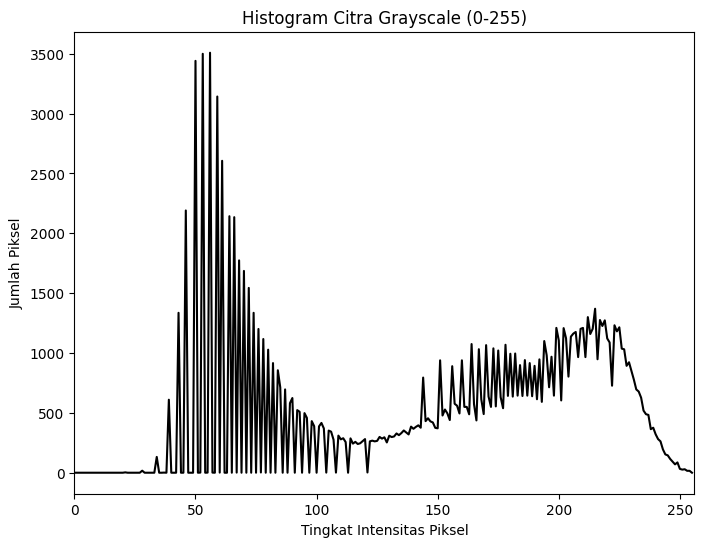

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('a.png', cv2.IMREAD_GRAYSCALE)
hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])


plt.figure(figsize=(8, 6))
plt.plot(hist, color='black')
plt.title('Histogram Citra Grayscale (0-255)')
plt.xlabel('Tingkat Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.xlim([0, 256])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

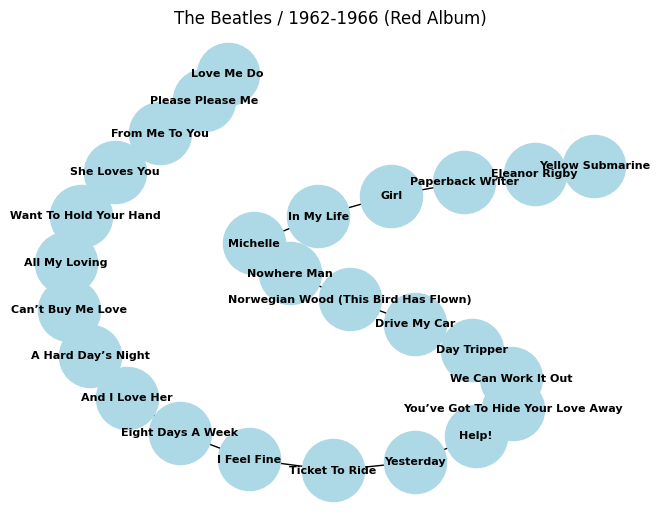

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

lagu = [
    'Love Me Do',
    'Please Please Me',
    'From Me To You',
    'She Loves You',
    'I Want To Hold Your Hand',
    'All My Loving',
    'Can’t Buy Me Love',
    'A Hard Day’s Night',
    'And I Love Her',
    'Eight Days A Week',
    'I Feel Fine',
    'Ticket To Ride',
    'Yesterday',
    'Help!',
    'You’ve Got To Hide Your Love Away',
    'We Can Work It Out',
    'Day Tripper',
    'Drive My Car',
    'Norwegian Wood (This Bird Has Flown)',
    'Nowhere Man',
    'Michelle',
    'In My Life',
    'Girl',
    'Paperback Writer',
    'Eleanor Rigby',
    'Yellow Submarine'
]

G.add_nodes_from(lagu)
for i in range(len(lagu) - 1):
    G.add_edge(lagu[i], lagu[i+1])

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='lightblue', font_size=8)
plt.title("The Beatles / 1962-1966 (Red Album)")
plt.show
